In [35]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re 
data = pd.read_csv('data.csv')
data_genre = pd.read_csv('data_by_genres.csv')

In [36]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


<Figure size 1152x720 with 0 Axes>

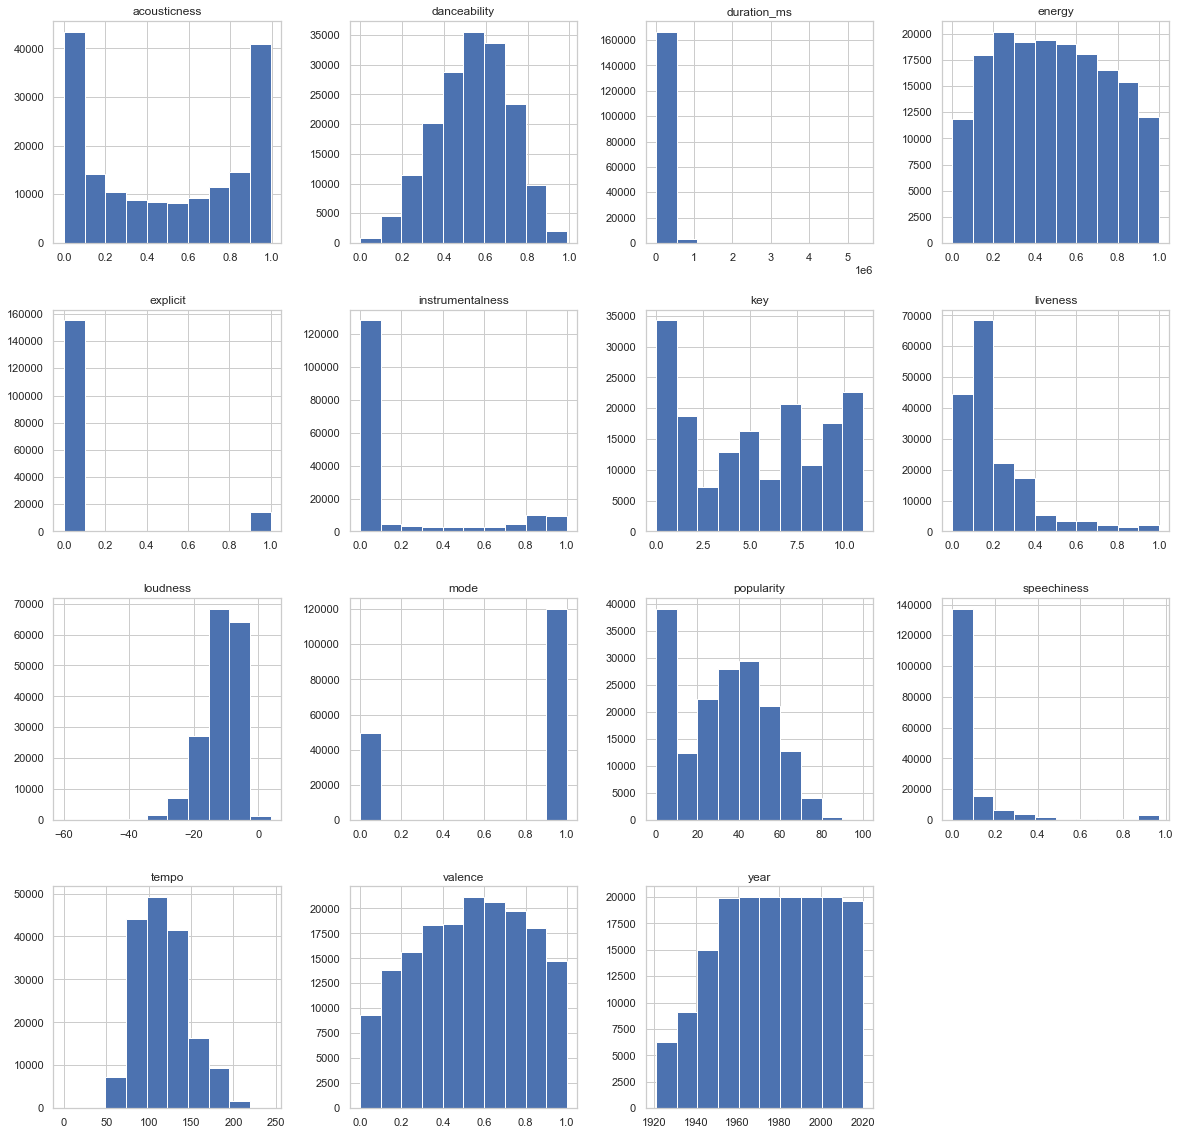

<Figure size 1152x720 with 0 Axes>

In [22]:
data.hist(figsize = (20, 20))
plt.figure(figsize=(16, 10))

In [30]:
plt.figure(figsize=(16, 10))
med_data = data[[ "acousticness","danceability", "energy", "instrumentalness", "liveness","speechiness","valence"]].groupby(data.year).median()
med_data.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
year,,,,,,,
1921,0.9885,0.3990,0.211,0.03785,0.1650,0.04540,0.4315
1922,0.9940,0.4895,0.201,0.32450,0.1575,0.06665,0.5490
1923,0.9920,0.5790,0.247,0.19900,0.1730,0.06790,0.6140
1924,0.9940,0.5620,0.323,0.84500,0.1850,0.06530,0.6930
1925,0.9890,0.5750,0.241,0.17400,0.1550,0.07590,0.6570


<Figure size 1152x720 with 0 Axes>

Text(0, 0.5, 'Density')

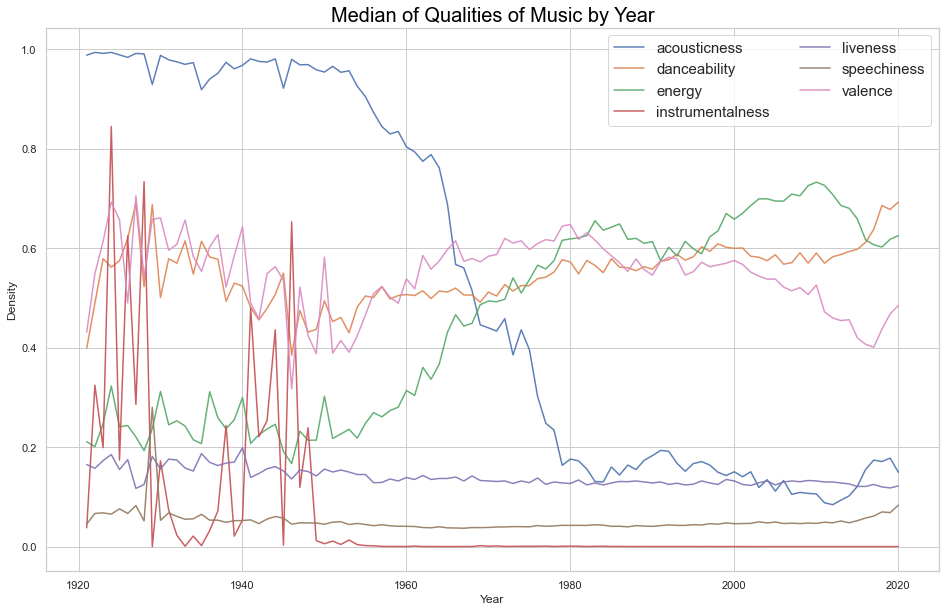

In [31]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in med_data.columns:
    plt.plot(med_data[column], marker='', linewidth= 1.5, alpha=0.9,label = column)


# Add legend
plt.legend(loc = 'upper right', ncol = 2,fontsize= 15)
 
# Add titles
plt.title("Median of Qualities of Music by Year", loc ='center', fontsize=20, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

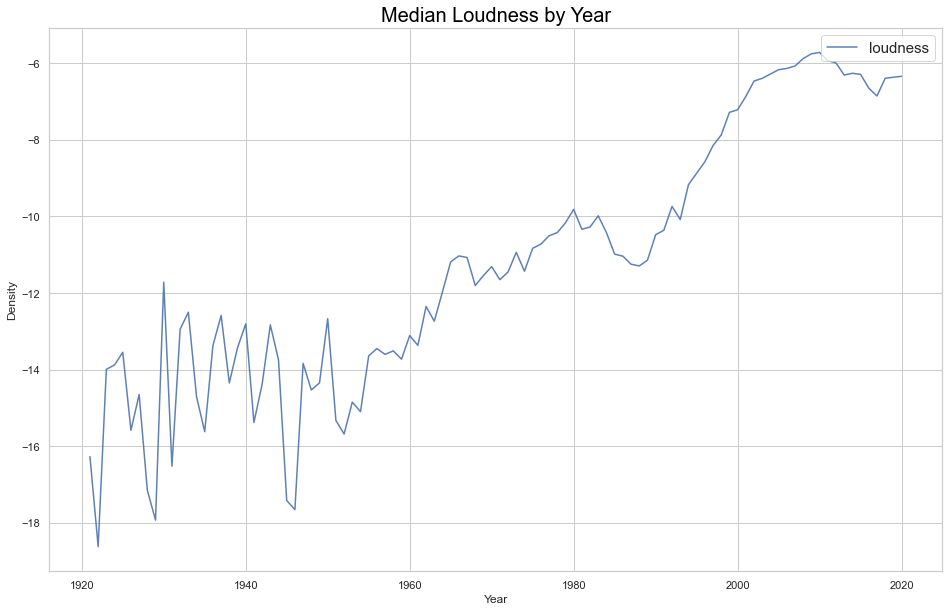

In [32]:
med_data2 = data[["loudness"]].groupby(data.year).median()
med_data2.head()

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot

for column in med_data2.columns:
    plt.plot(med_data2[column], marker='', linewidth= 1.5, alpha=0.9,label = column)


# Add legend
plt.legend(loc = 'upper right', ncol = 2,fontsize= 15)
 
# Add titles
plt.title("Median Loudness by Year", loc ='center', fontsize=20, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

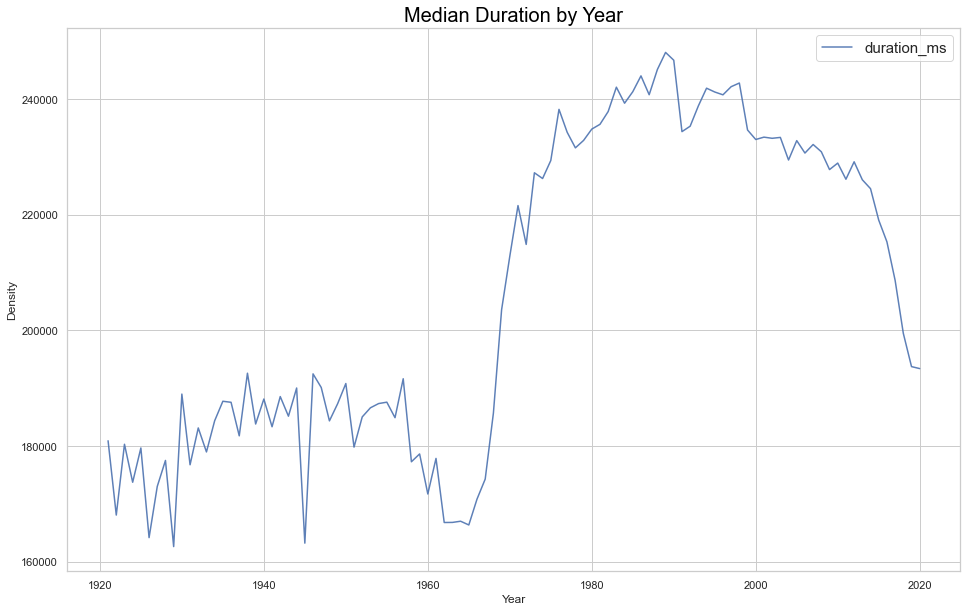

In [33]:
med_data3 = data[["duration_ms"]].groupby(data.year).median()
med_data3.head()

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot

for column in med_data3.columns:
    plt.plot(med_data3[column], marker='', linewidth= 1.5, alpha=0.9,label = column)


# Add legend
plt.legend(loc = 'upper right', ncol = 2,fontsize= 15)
 
# Add titles
plt.title("Median Duration by Year", loc ='center', fontsize=20, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Density")

In [34]:
data_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


<Figure size 1152x720 with 0 Axes>

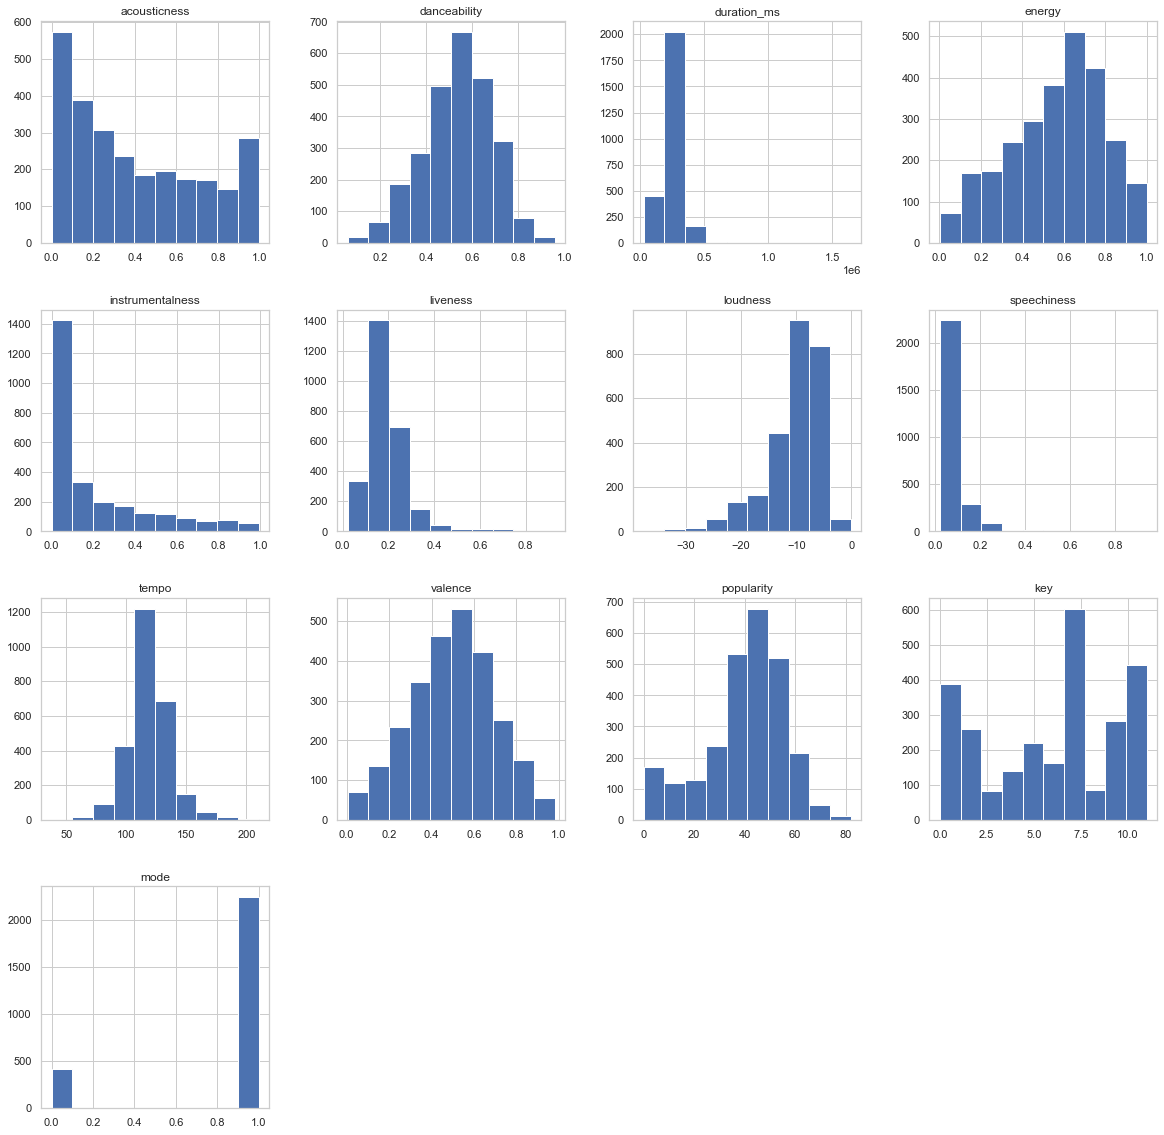

<Figure size 1152x720 with 0 Axes>

In [9]:
data_genre.hist(figsize=(20, 20)) 
plt.figure(figsize=(16, 10))

In [10]:
plt.figure(figsize=(16, 10))
list_genre = data_genre['genres'].to_list() #find the top 10 genres
listToStr = ' '.join([str(elem) for elem in list_genre]) 
wordlist = listToStr.split()
frequency = {}
for item in wordlist:
   if (item in frequency):
      frequency[item] += 1
   else:
      frequency[item] = 1
top_10_genres = sorted(frequency, key = frequency.get, reverse = True)[:11] #11 because hip hop is one word
top_10_genres

['pop',
 'indie',
 'rock',
 'metal',
 'jazz',
 'hop',
 'hip',
 'folk',
 'classical',
 'punk',
 'deep']

<Figure size 1152x720 with 0 Axes>

In [27]:
data_top10_genre = data_genre[data_genre['genres'].str.match('.*(pop|indie|rock|metal|jazz|hop|hip|folk|classical|punk|deep).*') == True]
data_top10_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
5,abstract hip hop,0.205872,0.723132,249095.103216,0.645461,0.002853,0.168032,-7.216007,0.250104,112.160287,0.584392,43.804971,11,1
9,acid jazz,0.155414,0.714200,284362.366667,0.694667,0.190613,0.106800,-10.234667,0.052020,112.243400,0.789367,44.033333,6,1
10,acid rock,0.258027,0.453541,252930.717351,0.592055,0.159560,0.235854,-11.124684,0.072292,125.465937,0.535975,34.500012,9,1
14,acoustic pop,0.485250,0.527821,234521.889438,0.482990,0.047114,0.153361,-9.214583,0.040122,117.555965,0.384601,52.866982,11,1
15,acoustic punk,0.374439,0.527967,192338.424286,0.614436,0.068067,0.180224,-8.175711,0.067979,120.960554,0.740857,38.998571,9,1


In [12]:
#data_top10_genre.hist(figsize = (20, 20))

In [13]:
seq = np.arange(0, len(top_10_genres)-1) #get sequence from 0 to 10
pop_df = data_genre[data_genre['genres'].str.match(".*(pop).*") == True] #filter data frame by each genre
indie_df = data_genre[data_genre['genres'].str.match(".*(indie).*") == True] 
rock_df = data_genre[data_genre['genres'].str.match(".*(rock).*") == True] 
metal_df = data_genre[data_genre['genres'].str.match(".*(metal).*") == True] 
jazz_df = data_genre[data_genre['genres'].str.match(".*(jazz).*") == True] 
hop_hop_df = data_genre[data_genre['genres'].str.match(".*(hip hop).*") == True] 
folk_df = data_genre[data_genre['genres'].str.match(".*(folk).*") == True] 
classical_df = data_genre[data_genre['genres'].str.match(".*(classical).*") == True]
punk_df = data_genre[data_genre['genres'].str.match(".*(punk).*") == True] 
deep_df = data_genre[data_genre['genres'].str.match(".*(deep).*") == True] 

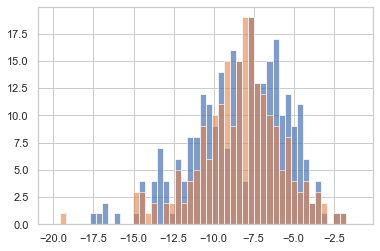

In [14]:
import matplotlib.pyplot as plt
import numpy as np

n, bins, _ = plt.hist(pop_df['loudness'], bins = 50, range=[-20, -1],alpha = 0.7)
_ = plt.hist(indie_df['loudness'], bins = bins, range=[-20, -1], alpha=0.6)

Text(0, 0.5, 'Density')

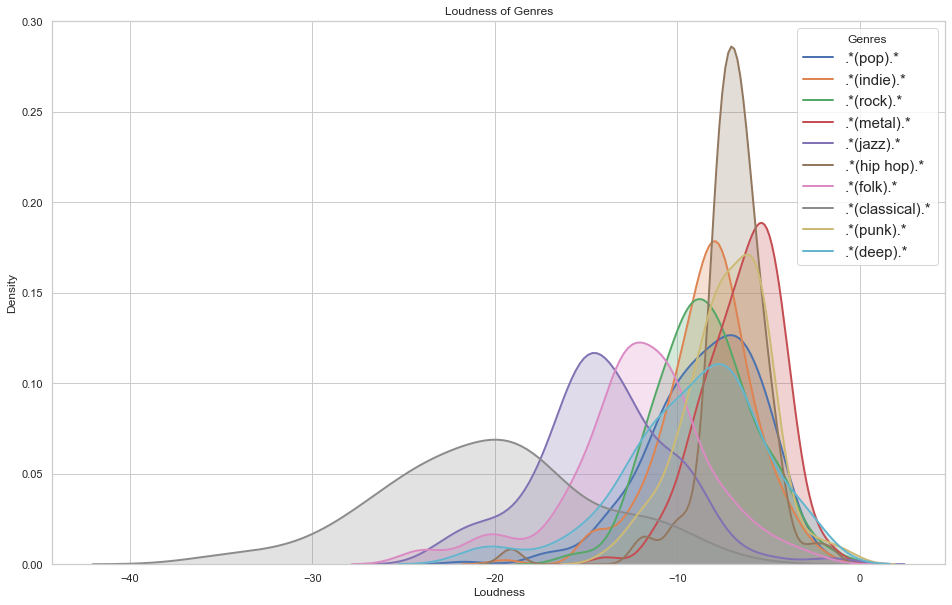

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
top10_genres = [".*(pop).*", ".*(indie).*", ".*(rock).*",".*(metal).*",".*(jazz).*",".*(hip hop).*",".*(folk).*",
         ".*(classical).*", ".*(punk).*",".*(deep).*"]

# Iterate through the 10 genres
for top10 in top10_genres:
    # Subset to the airline
    subset = data_genre[data_genre['genres'].str.match(top10) == True]
    
    # Draw the density plot
    sns.distplot(subset['loudness'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = top10)
    
# Plot formatting
plt.legend(prop={'size': 15}, title = 'Genres')
plt.title('Loudness of Genres')
plt.xlabel('Loudness')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

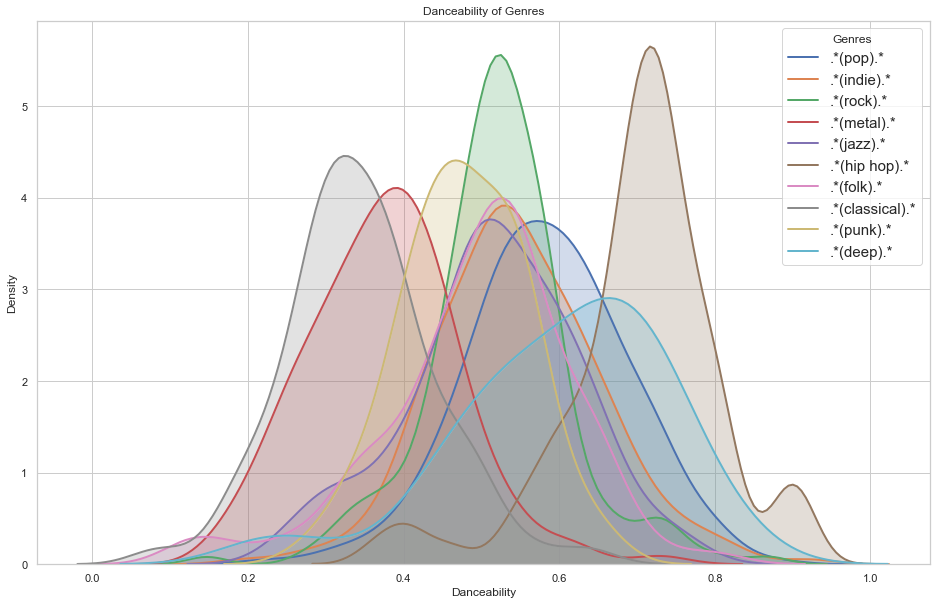

In [16]:
# Iterate through the 10 genres

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

for top10 in top10_genres:
    # Subset to the airline
    subset = data_genre[data_genre['genres'].str.match(top10) == True]
    
    # Draw the density plot
    sns.distplot(subset['danceability'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = top10)
    
# Plot formatting
plt.legend(prop={'size': 15}, title = 'Genres')
plt.title('Danceability of Genres')
plt.xlabel('Danceability')
plt.ylabel('Density')

In [17]:
data_wgenres = pd.read_csv('data_w_genres.csv')
data_wgenres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]
